In [1]:
import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend



# PNG
Load a dxf file, shows it at jupyter and saves a png file 

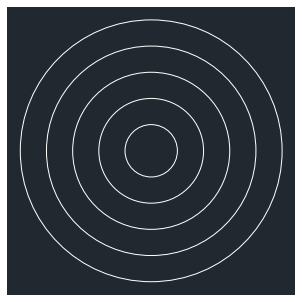

In [3]:
# Safe loading procedure (requires ezdxf v0.14):

try:
    doc, auditor = recover.readfile('tests/circles.dxf')
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig('your.png', dpi=300)


# PDF

you need pymupdf

In [4]:
import ezdxf
from ezdxf.addons.drawing import Frontend, RenderContext
from ezdxf.addons.drawing import layout, pymupdf

doc = ezdxf.readfile("tests/circles.dxf")
msp = doc.modelspace()
backend = pymupdf.PyMuPdfBackend()
Frontend(RenderContext(doc), backend).draw_layout(msp)

with open("your.pdf", "wb") as fp:
    fp.write(backend.get_pdf_bytes(layout.Page(0, 0)))

ImportError: cannot import name 'layout' from 'ezdxf.addons.drawing' (/home/luismiguel/.local/lib/python3.10/site-packages/ezdxf/addons/drawing/__init__.py)

# svg

In [5]:
from ezdxf.addons.drawing import Frontend, RenderContext
from ezdxf.addons.drawing import layout, svg

doc = ezdxf.readfile("tests/circles.dxf")
msp = doc.modelspace()
backend = svg.SVGBackend()
Frontend(RenderContext(doc), backend).draw_layout(msp)

with open("your.svg", "wt") as fp:
    fp.write(backend.get_string(layout.Page(0, 0)))

ImportError: cannot import name 'layout' from 'ezdxf.addons.drawing' (/home/luismiguel/.local/lib/python3.10/site-packages/ezdxf/addons/drawing/__init__.py)

# Photoplotter

In [6]:
import ezdxf
from ezdxf.addons.drawing import Frontend, RenderContext
from ezdxf.addons.drawing import layout, hpgl2

doc = ezdxf.readfile("tests/circles.dxf")
psp = doc.paperspace("Layout1")
backend = hpgl2.PlotterBackend()
Frontend(RenderContext(doc), backend).draw_layout(psp)
page = layout.Page.from_dxf_layout(psp)

with open("your.plt", "wb") as fp:
    fp.write(backend.normal_quality(page))



ImportError: cannot import name 'layout' from 'ezdxf.addons.drawing' (/home/luismiguel/.local/lib/python3.10/site-packages/ezdxf/addons/drawing/__init__.py)

In [ ]:
!ezdxf hpgl your.plt

using Qt binding: PySide6
HPGL2 data not found.
